## 0) Setup Environment

In [42]:
# My import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print('Imports ready')

Imports ready


## 1) Load Dataset

In [43]:
from google.colab import files

uploaded = files.upload()

Saving housing - housing.csv to housing - housing.csv


In [44]:
housing = list(uploaded.keys())[0]
df = pd.read_csv(housing)
print('Loaded:', housing, ' shape:', df.shape)

Loaded: housing - housing.csv  shape: (20640, 10)


## 2) First look and kind of a summary

In [45]:
display(df.head(15))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,NEAR BAY
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,NEAR BAY
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,NEAR BAY


In [46]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB
None


In [47]:
display(df.describe(include='all'))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


## 3) Data Quality


In [48]:
# Duplicates
dup_count = df.duplicated().sum()
print(f'Duplicated rows: {dup_count}')

# Missing values
print(df.isnull().sum())

Duplicated rows: 0
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


No duplicated rows, so we are good on that front. We also have missing info only on the total bedrooms.

In [49]:
print("\nValue counts for the 'Ocean proximity' column:\n", df['ocean_proximity'].value_counts())


Value counts for the 'Ocean proximity' column:
 ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


## 4) Visualisation (mostly for me to understand more about the data)

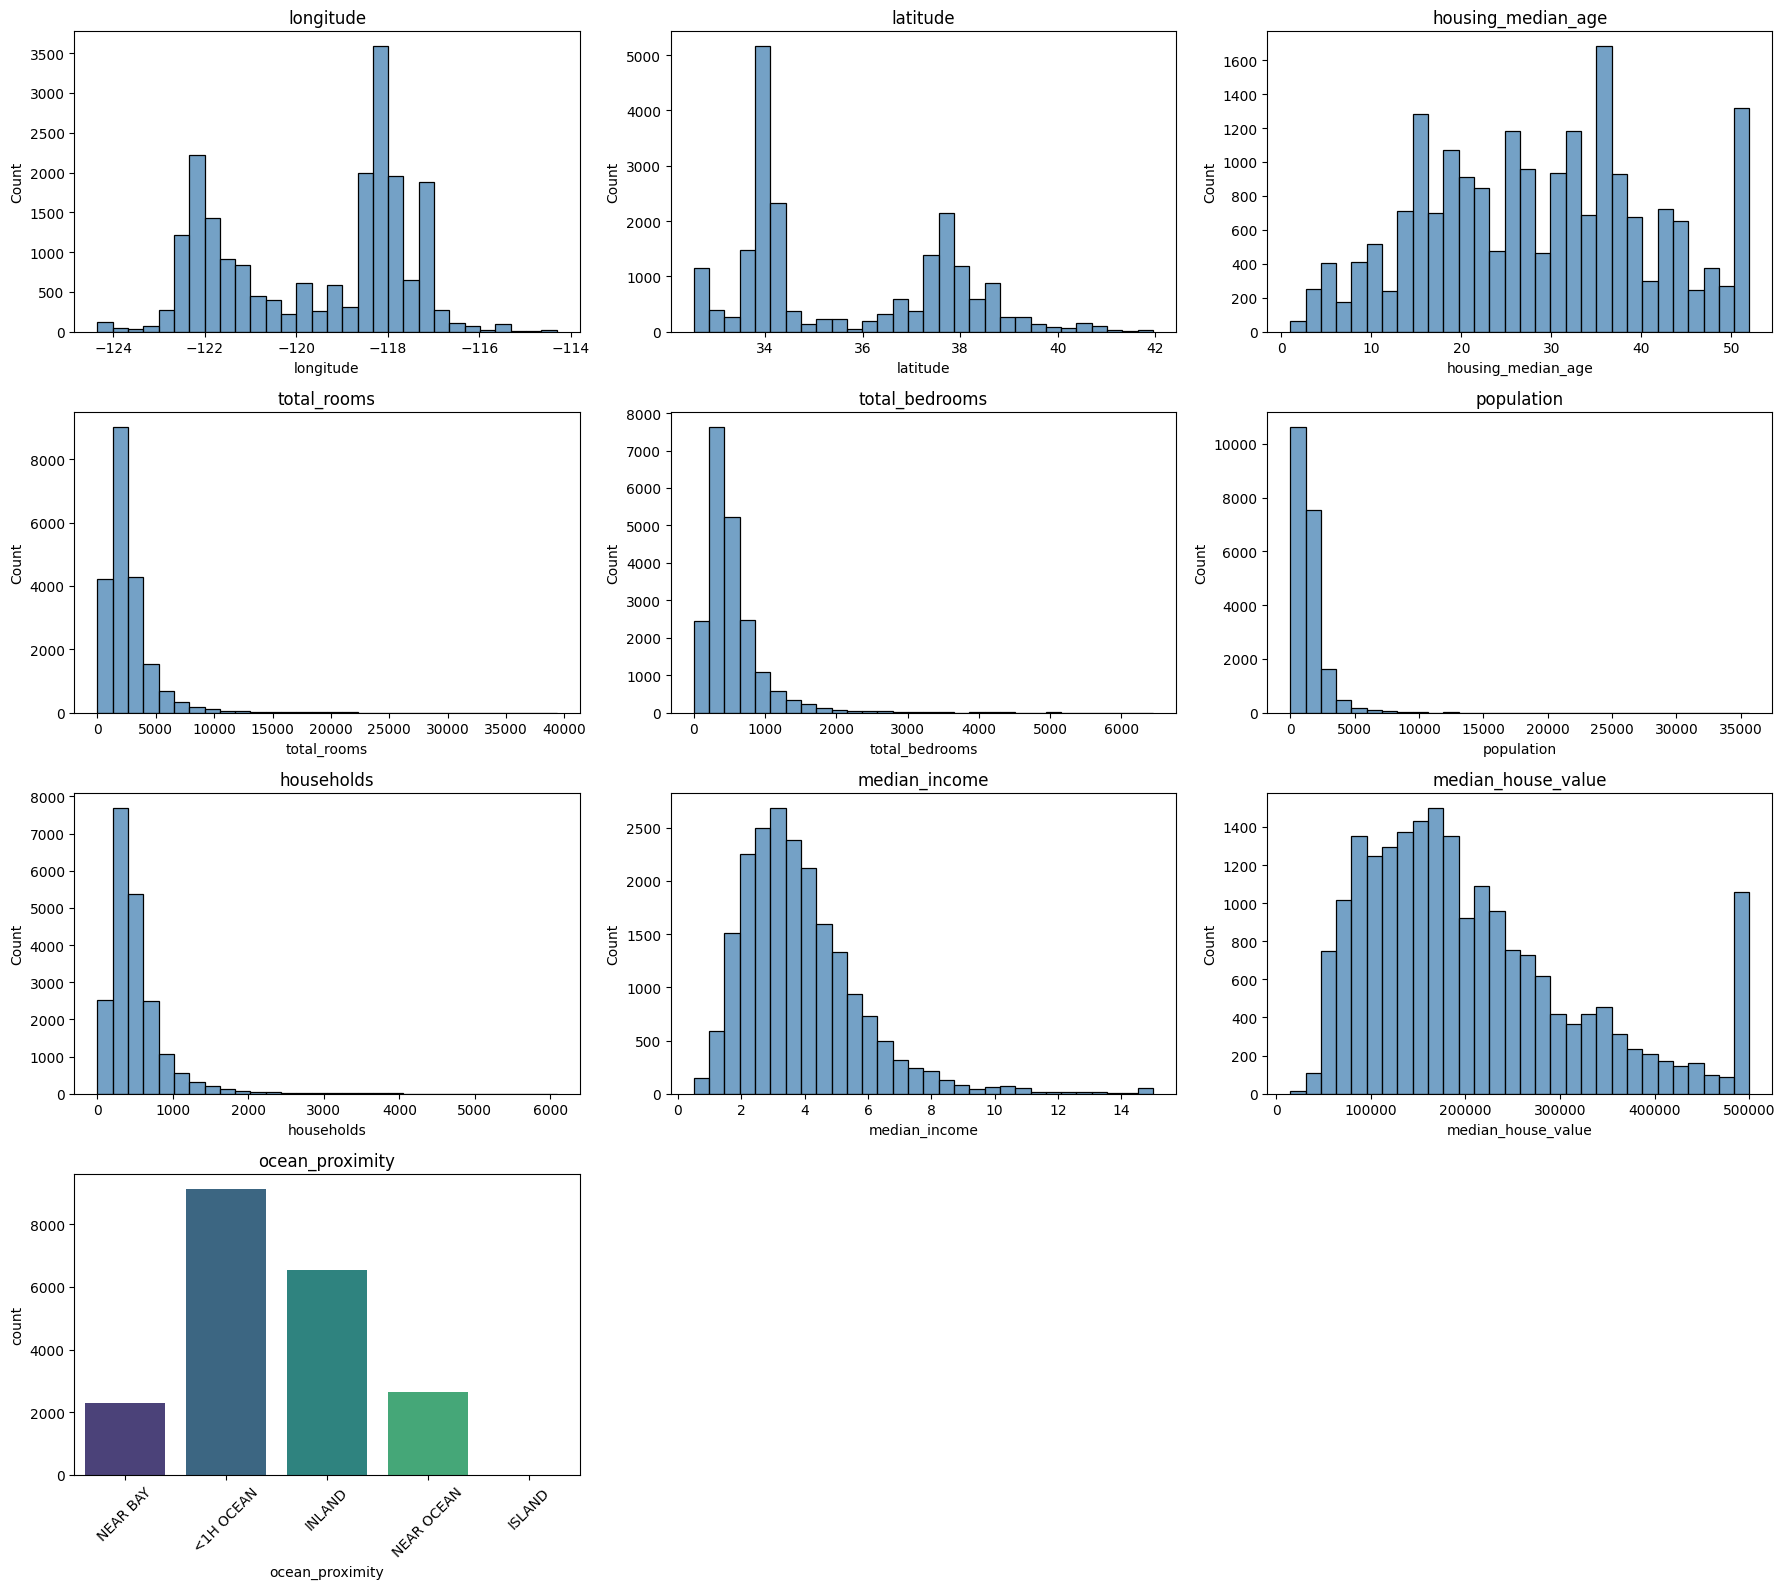

In [50]:
# Loop through columns
cols = df.columns
n_cols = 3
n_rows = -(-len(cols) // n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]

    if pd.api.types.is_numeric_dtype(df[col]):
        sns.histplot(df[col], bins=30, color="steelblue", ax=ax)
        ax.set_title(f"{col}", fontsize=12)

    elif isinstance(df[col].dtype, pd.CategoricalDtype) or df[col].dtype == "object":
        sns.countplot(data=df, x=col, hue=col, legend=False, palette="viridis", ax=ax)
        ax.set_title(f"{col}", fontsize=12)
        ax.tick_params(axis='x', rotation=45)

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

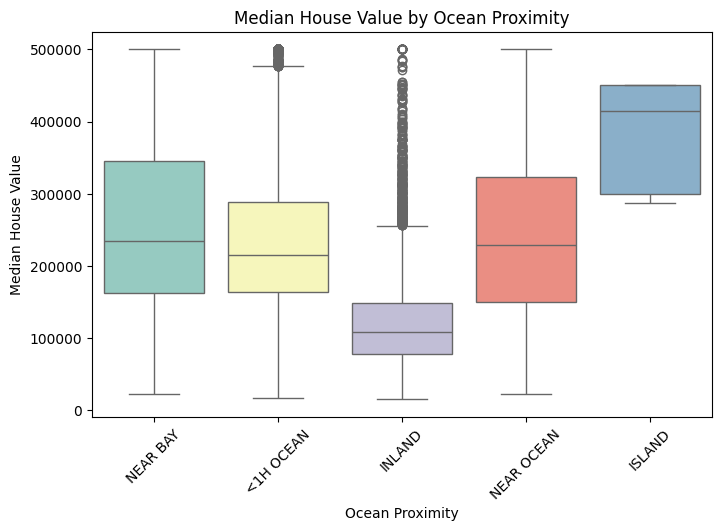

In [51]:
# Boxplot - house values by category
plt.figure(figsize=(8,5))
sns.boxplot(x="ocean_proximity", y="median_house_value", data=df, hue=col, legend=False, palette="Set3")
plt.title("Median House Value by Ocean Proximity")
plt.xlabel("Ocean Proximity")
plt.ylabel("Median House Value")
plt.xticks(rotation=45)
plt.show()

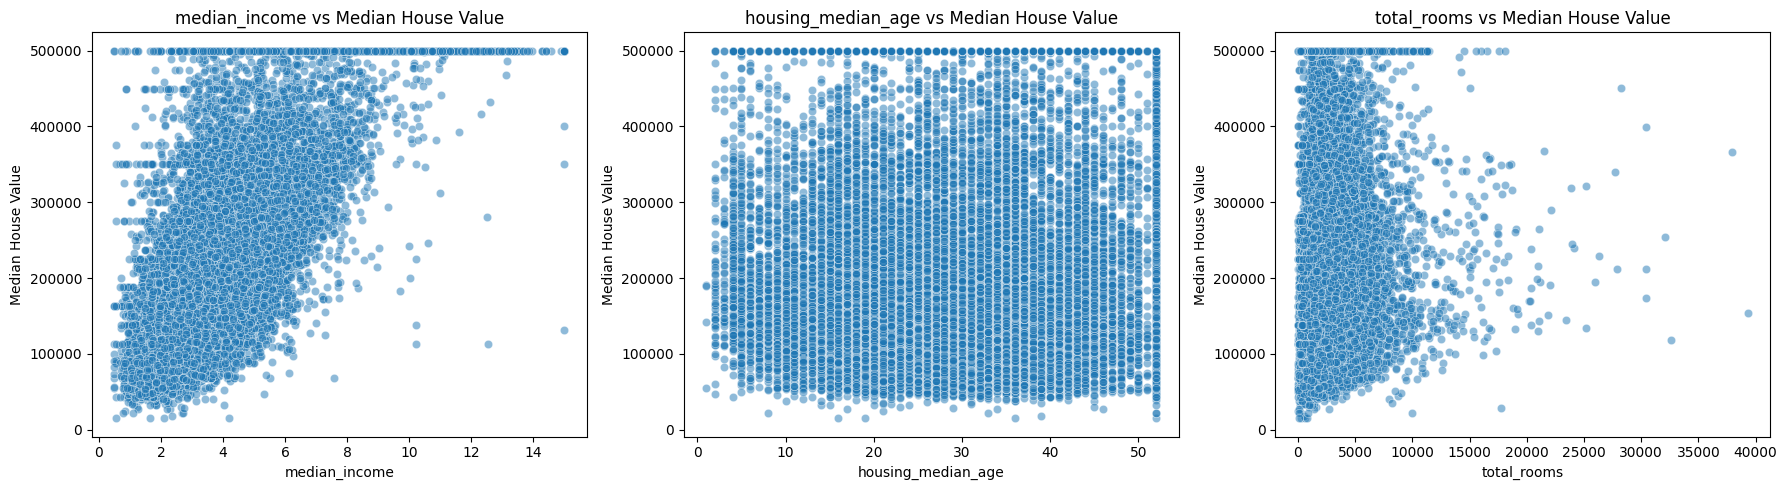

In [52]:
# Create subplots (1 row, 3 columns)
features_to_plot = ["median_income", "housing_median_age", "total_rooms"]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, feature in enumerate(features_to_plot):
    sns.scatterplot(x=df[feature], y=df["median_house_value"], alpha=0.5, ax=axes[i])
    axes[i].set_title(f"{feature} vs Median House Value")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Median House Value")

plt.tight_layout()
plt.show()

## 5) Processing the data

In [53]:
# Step 4: Preprocessing
# Fill missing values with median
df = df.fillna(df.median(numeric_only=True))

print("\nMissing data has been filled with median.")


Missing data has been filled with median.


In [54]:
# Encode categorical columns (if any)
df = pd.get_dummies(df, drop_first=True)

print("Catagorial cloumns have been encoded.")

Catagorial cloumns have been encoded.


In [55]:
# Define features and target
target = 'median_house_value'
X = df.drop(columns=[target])
y = df[target]

print("The features and targets have been split.")

The features and targets have been split.


In [56]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

Train shape: (16512, 12) Test shape: (4128, 12)


In [57]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("The features have been scaled with StandardScaler")

The features have been scaled with StandardScaler


## 6) Build & Train the Model

In [58]:
# training the model for the prediction
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("The model has been trained.")

The model has been trained.


In [59]:
#Evaluating the Model
y_pred = model.predict(X_test_scaled)

print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

print("Model's performance evaluated.")

MSE: 4908476721.156616
RMSE: 70060.52184473518
R² Score: 0.6254240620553606
Model's performance evaluated.


## 8) Final Visualization of the predicted prices

Model evaluation visualizations:


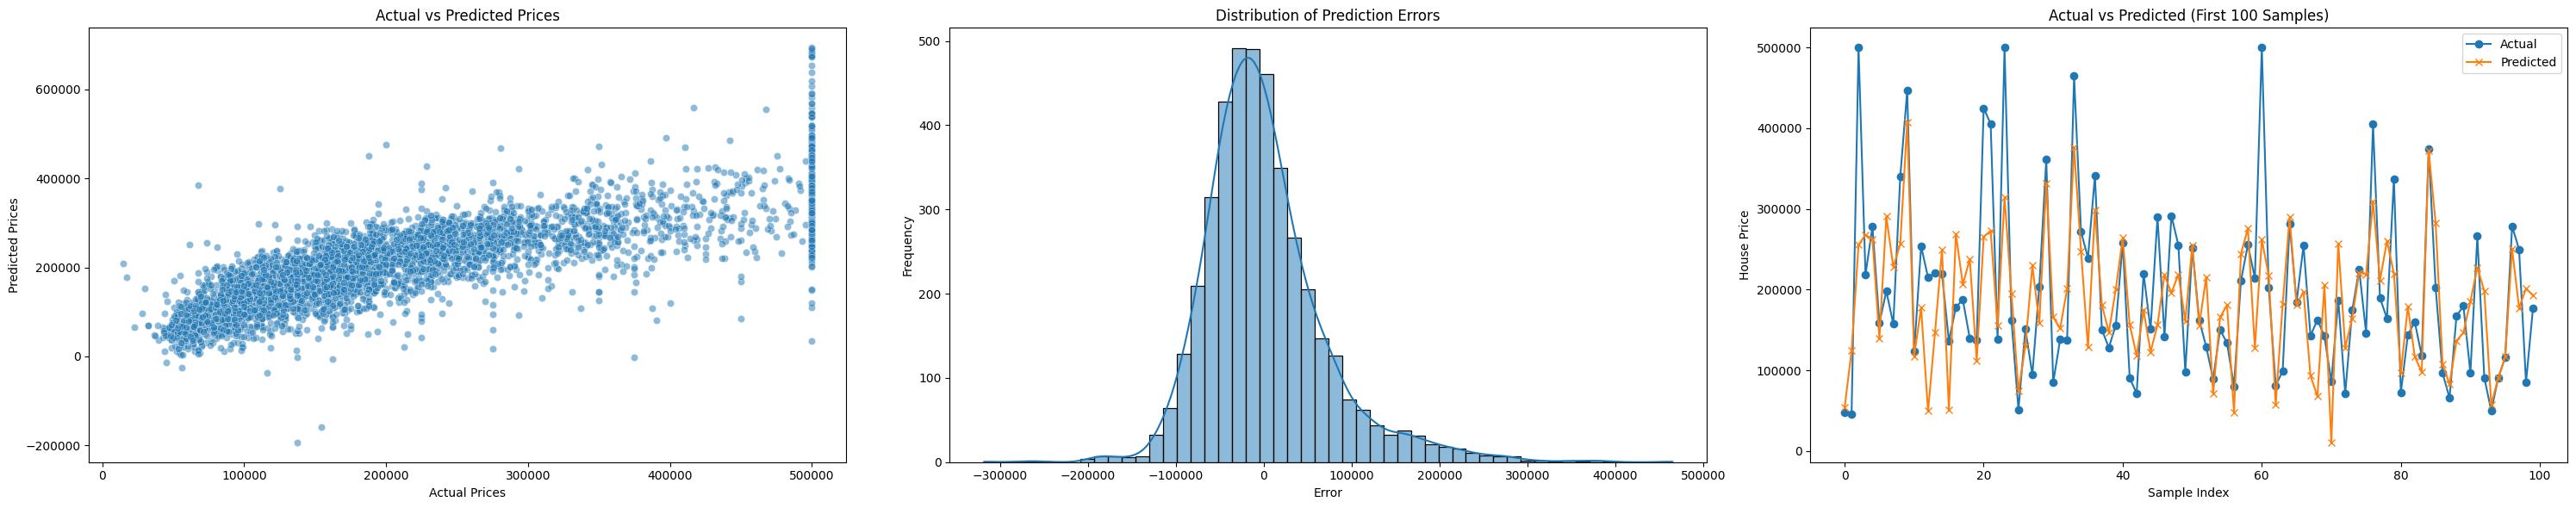

In [60]:
# Model Evaluation Visualizations in Subplots
print("Model evaluation visualizations:")

fig, axes = plt.subplots(1, 3, figsize=(30,6))

# 1. A scatter plot fort the actual vs predicted
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, ax=axes[0])
axes[0].set_xlabel("Actual Prices")
axes[0].set_ylabel("Predicted Prices")
axes[0].set_title("Actual vs Predicted Prices")

# Calculate residuals
residuals = y_test - y_pred

# 2. A histogram of errors
sns.histplot(residuals, bins=50, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Prediction Errors")
axes[1].set_xlabel("Error")
axes[1].set_ylabel("Frequency")

# 3. A line plot: actual vs predicted
axes[2].plot(y_test.values[:100], label="Actual", marker="o")
axes[2].plot(y_pred[:100], label="Predicted", marker="x")
axes[2].legend()
axes[2].set_title("Actual vs Predicted (First 100 Samples)")
axes[2].set_xlabel("Sample Index")
axes[2].set_ylabel("House Price")

plt.tight_layout()
plt.show()